In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("C:/Users/maths/Desktop/FML-AVI-230957164/Week 4/FuelConsumption.csv")

# Display the first few rows of the dataset to understand its structure
print(data.head())


   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

In [6]:
# Select the relevant features
X = data[['ENGINESIZE']]  # Engine size is the feature
y = data['CO2EMISSIONS']  # CO2 emissions are the target


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


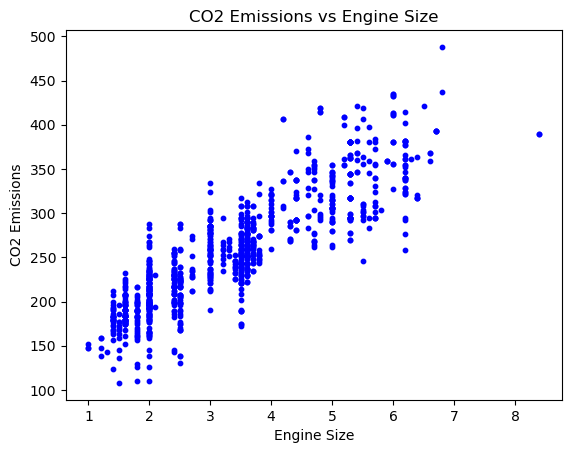

In [8]:
# Plot the data
plt.scatter(X, y, color='blue', s=10)
plt.title('CO2 Emissions vs Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()


In [9]:
# Function to evaluate polynomial regression models
def polynomial_regression(degree):
    poly = PolynomialFeatures(degree=degree)
    
    # Transform the feature into polynomial features
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Fit the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict using the model
    y_pred = model.predict(X_test_poly)
    
    # Calculate the evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mae, mse, r2, model

# Evaluate for different degrees
for degree in [3, 4, 5]:
    print(f"\nEvaluating Polynomial Regression of Degree {degree}")
    mae, mse, r2, model = polynomial_regression(degree)
    print(f"Mean Absolute Error: {mae}")
    print(f"Residual Sum of Squares (MSE): {mse}")
    print(f"R2 Score: {r2}")



Evaluating Polynomial Regression of Degree 3
Mean Absolute Error: 22.803414939307483
Residual Sum of Squares (MSE): 879.2723986521471
R2 Score: 0.782007425512268

Evaluating Polynomial Regression of Degree 4
Mean Absolute Error: 22.74155535665774
Residual Sum of Squares (MSE): 880.9577757653376
R2 Score: 0.7815895803752544

Evaluating Polynomial Regression of Degree 5
Mean Absolute Error: 22.813403203233463
Residual Sum of Squares (MSE): 882.0383693656026
R2 Score: 0.781321675478822


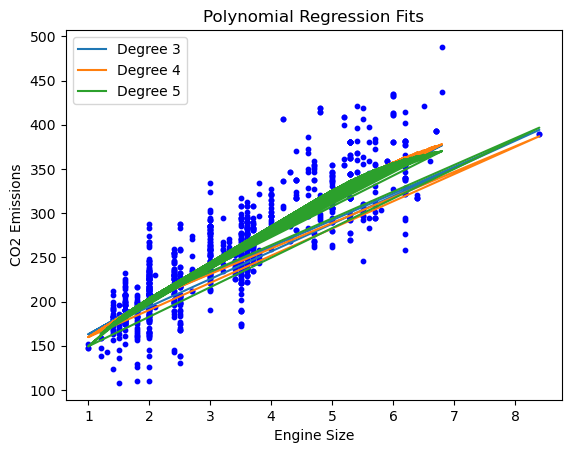

In [10]:
# Plotting the polynomial fit for degree 3, 4, and 5
plt.scatter(X, y, color='blue', s=10)

# For each polynomial degree
for degree in [3, 4, 5]:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_poly_pred = model.predict(X_poly)
    
    plt.plot(X, y_poly_pred, label=f'Degree {degree}')

plt.title('Polynomial Regression Fits')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.show()
